# Chaîne de traitement _data science_.
## _Classification_ avec `python` 


# Setup

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# MNIST

 C'est une base de données de chiffres manuscrits. La base MNIST s'est affirmée comme un standard du _ML_. Ce sont des images en noir et blanc, carrées, normalisées centrées de 28 pixels de côté.

Nous allons le télécharger et charger le fichier `.mat` en mémoire:

In [0]:
from six.moves import urllib
from scipy.io import loadmat

mnist_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [0]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

Le jeu de données est un dictionnaire constitué de :
- Un tableau `data` dont chaque instance est une ligne et chaque _feature_ est une colonne
- Un tableau d'étiquettes `targets`
- Une description `DESCR` et la liste des noms des champs du _dataset_ `COL_NAMES`

In [0]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

In [0]:
28*28

784

In [0]:
some_digit = X[36000]
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

- Les $70000$ instances de `data` sont des tableaux contenant chacun $28^2$ valeurs, manifestement des niveaux de gris contenus entre $0$ (blanc) et $255$ (noir).
- `target` est un tableau à une dimension de longueur $70000$ également.

On peut utiliser la fonction `imshow` de `matplotlib` pour afficher l'image correspondante.

Saving figure some_digit_plot


FileNotFoundError: ignored

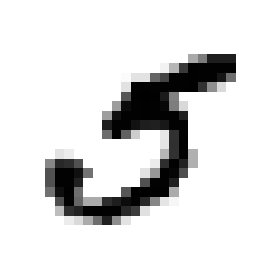

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

L'image ressemble à un 5 manuscrit. Verifions son étiquetage.

5.0

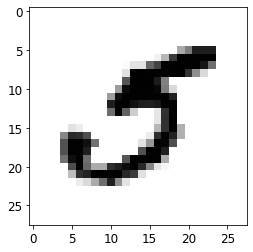

In [0]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
some_target = y[36000]
some_target

Nous allons souvent avoir besoin d'observer nos données en tant qu'image, nous définissons une fonction à cet effet :

In [0]:
def plot_digit(data):
    some_digit_image = data.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    some_target = y[data]
    some_target

On va représenter quelques échantillons de données sur une matrice :

In [0]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


FileNotFoundError: ignored

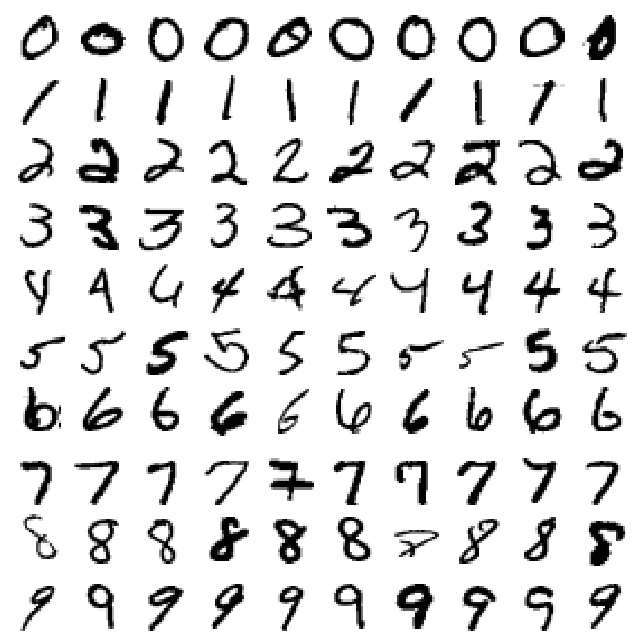

In [0]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

plt.show()

## Constitution du jeu de test et du jeu d'entraînement

Il faut maintenant constituer un jeu de données de test on split alors `mnist` en un jeu d'entraînement et un jeu de test.

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Nous allons mélanger les données pour éviter d'influencer nos algos.


In [0]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]
y_train

array([1., 6., 6., ..., 0., 2., 9.])

## Entraînement d'un classifieur binaire

Nous allons dans un premier temps simplifier le problème en créant un _classifieur binaire_ prédisant si le digit représenté par une instance _est un $5$_ ou _n'est pas un $5$_. Nous créons pour cela à partir des anciennes deux nouveaux jeux d'étiquettes (`y_train_5` et `y_test_5`) à valeurs booléennes :

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Nous allons entraîner un classifieur par _descente de gradient stochastique_ en utilisant le `SGDClassifier` de `scikit-learn`. Cet algorithme a pour principal atout de traiter chaque instance indépendamment, il est donc particulièrement adapté pour l'apprentissage _online_. 

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Notre modèle est maintenant prêt à prédire :

In [0]:
sgd_clf.predict([some_digit])

array([ True])

Notre chiffre est bien un $5$. La prédiction est valide. Nous devons néanmoins mesurer plus finement la performance de notre modèle.

## Mesurer la performance

### _Cross-validation_

Nous allons _cross_-valider notre modèle. Ci-dessous, nous réalisons ce travail _à la main_. Nous réalisons ensuite la même opération avec le `cross_val_score` de `scikit-learn` qui utilise lui-aussi une stratification.

In [0]:
# cross-val a la mano
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.96225


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9645
0.94765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
# ⨯-val avec scikit-learn
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.96225, 0.9645 , 0.94765])

Comparons maintenant ce résultat à celui d'un classificateur absurde classant toutes les instances qu'on lui propose dans la catégorie `pas 5`.

On crée le classifieur:

In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        X_shape = np.zeros(X.shape[0])
        return X_shape

Puis on _cross_-valider une instance :

In [0]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

### Matrice de confusion

La _matrice de confusion_ est l'outil incontournable lorsqu'il s'agit d'étudier les performances d'un système de classification supervisé.  une matrice de confusion dans le cas général :

|_label_|classé $1$|classé $2$|classé $3$|...|classé $n$|
|---|---|---|---|---|---|
|**$1$**|**$1$ classés $1$**|_$1$ classés $2$_|_$1$ classés $3$_|...|_$1$ classés $n$_|
|**$2$**|_$2$ classés $1$_|**$2$ classés $2$**|_$2$ classés $3$_|...|_$2$ classés $n$_|
|**$3$**|_$3$ classés $1$_|_$3$ classés $2$_|**$3$ classés $3$**|...|_$3$ classés $n$_|
|...|...|...|...|...|...|
|**$n$**|_$n$ classés $1$_|_$n$ classés $2$_|_$n$ classés $3$_|...|**$n$ classés $n$**|

dans le cas binaire :

|_label_|classé FAUX|classé VRAI|
|---|---|---|
|**FAUX**|**vrai NEGATIF**|_faux POSITIF_|
|**VRAI**|_faux NEGATIF_|**vrai POSITIF**|

Nous allons calculer cette matrice pour notre classifieur.

|_label_|classé `non 5`|classé `5`|
|---|---|---|
|`non 5`|**vrai NEGATIF**|_faux POSITIF_|
|`5`|_faux NEGATIF_|**vrai POSITIF**|

On utilise `cross_val_predict`. Cette fonction permet d'obtenir, pour chaque _fold_ du jeu d'entraînement, les prédictions obtenues en apprenant sur le reste des données.

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


On peut maintenant calculer la matrice de confusion avec `confusion_matrix`

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53417,  1162],
       [ 1350,  4071]])

On la compare la matrice de confusion qui serait produite par un classifieur parfait :

In [0]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Nous allons maintenant nous interresser d'une part à la _précision_ et de l'autre au _recall_ pour un classifieur binaire.

$$
\newcommand\TP{\mbox{TP}}
\newcommand\TN{\mbox{TN}}
\newcommand\FP{\mbox{FP}}
\newcommand\FN{\mbox{FN}}
\newcommand\precision{\mbox{precision}}
\newcommand\recall{\mbox{recall}}
$$

La _precision_ est l'_accuracy_ des prédictions positives :

$$
\precision = \frac{\TP}{\TP+\FP}
$$

Le _recall_ est le _ratio_ de positifs correctement classifiés :

$$
\recall = \frac{\TP}{\TP+\FN}
$$



### Précision et _recall_

On peut calculer la _precision_ et le _recall_ grâce à `scikit-learn` :

In [0]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7779476399770686

In [0]:
precision_verif = 4071 / (4071+1162)
precision_verif# vérification du score

0.7779476399770686

In [0]:
recall_score(y_train_5, y_train_pred)

0.7509684560044272

In [0]:
recall_verif = 4071 / (4071 + 1350)
recall_verif

0.7509684560044272

Nous lisons bien, quand notre _5-classifieur_ affirme qu'un chiffre est un 5, il n'est dans le vrai que 77% des fois. De plus, il ne détecte que 80% des 5. 

Il est fréquent d'utiliser la _moyenne harmonique_ de la _precision_ et du _recall_ comme métrique _unifiée_. La moyenne hamonique a comme atout de donner beaucoup de poids au valeurs faibles, ce qui n'autorise un score élevé que si les deux mesures de bases le sont. On appelle ce score le $F_1$-score.

$$
F_1 = \frac{2}{\frac{1}{\precision}+\frac{1}{\recall}} = 2 \times \frac{\precision \times \recall}{\precision + \recall} = \frac{\TP}{\TP+\frac{\FN+\FP}{2}}
$$

In [0]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7642200112633752

Le $F_1$-score favorise le fait d'avoir une _precision_ et un _recall_ proches l'un de l'autre. 

 nous pouvons appeler la fonction de décision.

In [0]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([150526.40944343])

In [0]:
threshold = 0 # seuil par défaut du classifier
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [0]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Le chiffre n'est plus reconnu comme `5` avec un tel seuil. On peut se convaincre que réhausser le seuil abaisse le _recall_. On va calculer (_via_ `cross_val_predict`) les résultats de la fonction de décision pour tout notre jeu d'entraînement.

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
y_scores.shape

(60000,)

On vérifie que les prédictions anterieures avaient bien été calculées avec un seuil égal à zéro :

In [0]:
treshold = 0
y_some_digit_pred = (y_pred > treshold)
y_some_digit_pred

array([ True,  True,  True, ..., False, False, False])

On calcule la _precision_ et le _recall_ pour tous les seuils possible. On utilise `precision_recall_curve`

In [0]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


FileNotFoundError: ignored

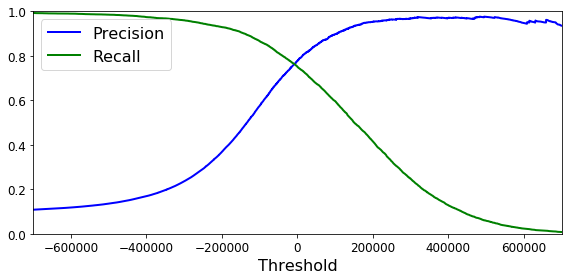

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

plt.show()

Ce graphique nous permet de fixer le seuil en fonction du compromis que nous souhaitons obtenir.

on va essayer de confronter graphiquement la _precision_ et le _recall_.

Saving figure precision_vs_recall_plot


FileNotFoundError: ignored

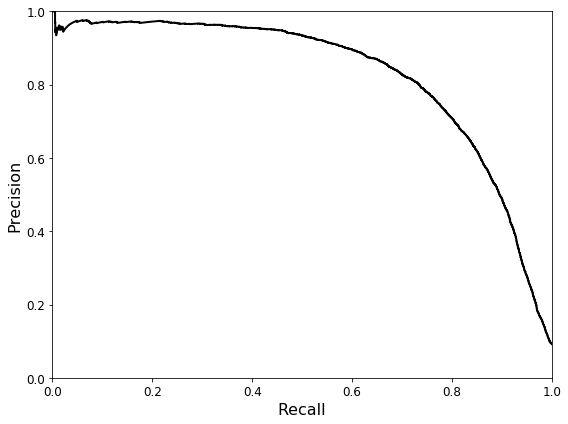

In [0]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

On constate une chute importante de la _precison_ autour de 75% de _recall_. 

Admettons que l'on vise une _précision_ aux alentours de 90%. On peut fixer le seuil en utilisant nos graphiques :

In [0]:
y_train_pred_90 = (y_scores > 70000)

precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.8712083540527101, 0.6463752075262866)

On peut obtenir un classifieur de précision arbitrairement élevée en jouant sur le seuil.

### Courbe ROC

La _courbe ROC_ est un autre moyen d'évaluer un classifieur binaire. Elle confronte le _taux de vrai positif_ (_TPR_ ou _recall_) au _taux de faux positif_ (_FPR_).
$$
\newcommand\TPR{\mbox{TPR}}
\newcommand\FPR{\mbox{FPR}}
$$
On se souvient de la formule du _recall_, soit de celle du _TPR_ :
$$
\TPR = \frac{\TP}{\TP+\FN}
$$
Et de même on a celle du _FPR_ :
$$
\FPR = \frac{\FP}{\TN+\FP}
$$
Nous allons construire cette courbe.

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


FileNotFoundError: ignored

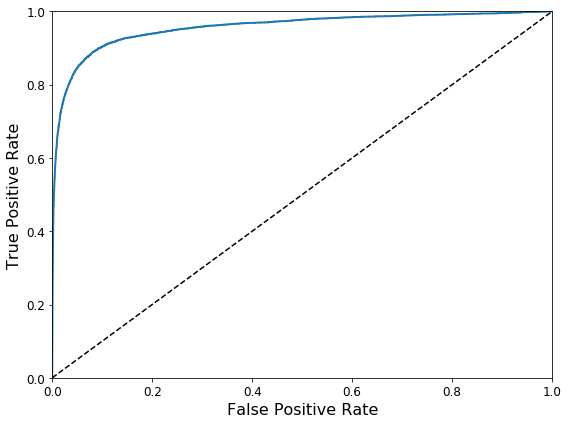

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

Un grand taux de vrais positifs implique beaucoup de faux positifs. La diagonal en pointillé représente la ROC d'un classifier aléatoire. Un classificateur idéal s'en écarte au maximum en épousant le coin supérieur gauche. C'est pourquoi on utilise comme métrique de comparaison l'_air sous la courbe_ ROC, que l'on souhaite la plus proche possible de $1$. Nous allons la calculer avec `roc_auc_score`

In [0]:
from sklearn.metrics import roc_auc_score
y_roc = roc_auc_score(y_train_5, y_scores)
y_roc

0.9562435587387078

## Comparaison de deux modèles

###  _random forest classifier_

On désire comparer notre modèle à un _random forest classifier_. 

Nous allons utiliser `predict_proba()` pour construire une courbe _ROC_.

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
                                    #CODE A COMPLETER

In [0]:
y_probas_forest

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

Nous allons calculer un score. Nous allons considérer la probabilité de la classe positive (deuxième colonne) puis appliquer `roc_curve`.

In [0]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Nous pouvons maintenant comparer nos courbes :

Saving figure roc_curve_comparison_plot


FileNotFoundError: ignored

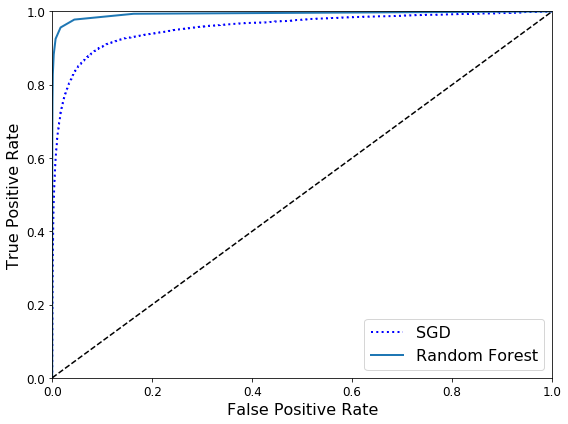

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)

plt.show()

On est beaucoup plus proche du coin. Calculons l'_AUC_ :

In [0]:
y_roc = roc_auc_score(y_train_5, y_scores_forest)
y_roc

0.9931243366003829

In [0]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [0]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

## Classification multi-classe

Il existe des algorithmes naturellement multi-classes tels que les random forest ou les classificateurs bayesiens. Pour les autres (_SVM_, _classifieurs linéaires_, _etc_), une stratégie est d'utiliser un _classifieur_ par classe et de choisir celle ou le score de décision et le plus grand. C'est la stratégie _one-versus-all_ (_OvA_).

Une autre startégie est de construire un _classifieur_ binaire pour toute paire de classes(qui distingue les `1` et les `4`, les `7` et les `2`, _etc_.) C'est la stratégie _one-versus-one_ (_OvO_). 

### Stratégie _OvA_

Essayons avec notre `SGCDClassifier` :

In [0]:
sgd_clf.fit(X_train, y_train) # y_train ET NON y_train_5
sgd_clf.predict([some_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([5.])

La fonction `fit()` a appliqué une startégie _OvA_. Et la prédiction est bonne.

on peut appeler la fonction de décision et simuler la prédiction :

In [0]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-152619.46799791, -441052.22074349, -249930.3138537 ,
        -237258.35168498, -447251.81933158,  120565.05820991,
        -834139.15404835, -188142.48490477, -555223.79499145,
        -536978.92518594]])

In [0]:
class_max_index = np.argmax(some_digit_scores)
class_max_index

5

In [0]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [0]:
sgd_clf.classes_[class_max_index]

5.0

### Stratégie _OvO_

Essayons maintenant la deuxième stratégie :

In [0]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

array([5.])

In [0]:
len(ovo_clf.estimators_)

45

### Forêt aléatoire

Pas d'_OvA_ ni d'_OvO_ pour cet algorithme nativement multiclasse.

In [0]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [0]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

### Cross-validation

Evaluons un modèle par _cross-validation_.

In [0]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.84993001, 0.81769088, 0.84707706])

(un classifier random aurait approx. 10% d'_accuracy_.
On peut tenter de faire du _scaling_ pour améliorer la solution.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91211758, 0.9099955 , 0.90643597])

C'est un réel progrès que nous pouvons mesurer.

### Analyse d'erreur

 Affichons la matrice de confusion :

In [0]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5749,    4,   22,   11,   11,   40,   36,   11,   36,    3],
       [   2, 6490,   43,   24,    6,   41,    8,   12,  107,    9],
       [  53,   42, 5330,   99,   87,   24,   89,   58,  159,   17],
       [  46,   41,  126, 5361,    1,  241,   34,   59,  129,   93],
       [  20,   30,   35,   10, 5369,    8,   48,   38,   76,  208],
       [  73,   45,   30,  194,   64, 4614,  106,   30,  170,   95],
       [  41,   30,   46,    2,   44,   91, 5611,    9,   43,    1],
       [  26,   18,   73,   30,   52,   11,    4, 5823,   14,  214],
       [  63,  159,   69,  168,   15,  172,   54,   26, 4997,  128],
       [  39,   39,   27,   90,  177,   40,    2,  230,   78, 5227]])

On affiche l'image 

Saving figure confusion_matrix_plot


FileNotFoundError: ignored

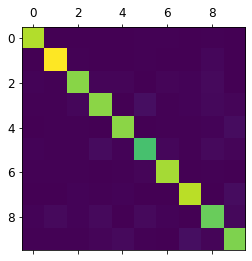

In [0]:
plt.matshow(conf_mx)
plt.show()

Tout a l'air correct. La diagonale est peuplée et le reste l'est peu. La classe `5` est légèrement plus sombre. 
Nous allons tâcher de mettre en évidence les erreurs en divisant chaque valeur par le nombre d'images dans la classe correspondante. On comparera plus aisément des taux plutôt que des quantités.

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


FileNotFoundError: ignored

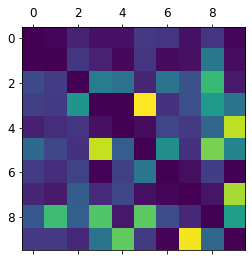

In [0]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx)

plt.show()

On a maintenant une vue bien plus précise des erreurs qui sont commises. On sait que beaucoup d'images sont considérées comme des 8 par erreur.

On voit aussi que beaucoup de 3 sont classés dans `5`. On va donc afficher une partie des effectifs des classes `3` et `5` dans la configuration de la matrice de confusion.

Saving figure error_analysis_digits_plot


FileNotFoundError: ignored

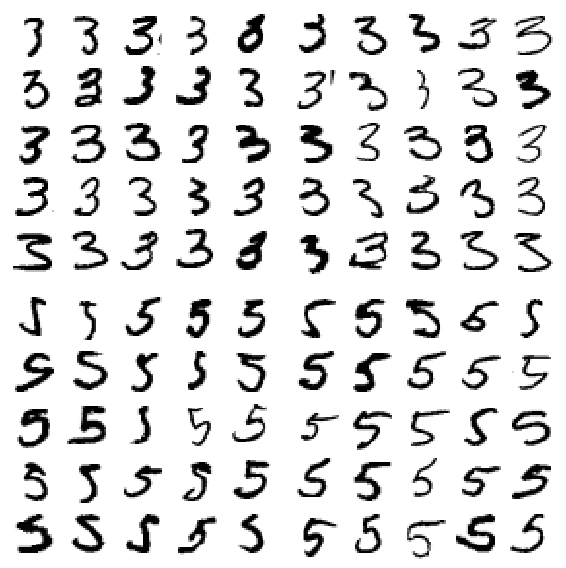

In [0]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

L'observation de ces images nous incite à considérer de nouvelles stratégies :
- On utilise un algo linéaire qui donne un poids à chaque pixel. Ça ne permet pas de palier certaines petites imperfection.
- On pourrait utiliser un preprocessing pour faciliter l'apprentissage.




## Classification multilabel

Le besoin d'attribuer plusieurs labels à une même instance peut exister. On peut imaginer un algorithme de reconnaissance faciale reconnaissant 5 personnes sur la même photographie. Nous allons créer un modèle décidant si un chiffre manuscrit est supérieur ou égal à 7 (`large`) et impair (`odd`).

In [0]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7 # On construit y_train_large à partir de y_train
y_train_odd = ((y_train %2) != 0) # De même pour y_train_odd
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [0]:
#peut prendre plusieurs heures la réponse nous ait donnée
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
# f1_score(y_multilabel, y_train_knn_pred, average="macro") # average="weighted" si classes déséquilibrées

# resultat : 0.977 approx

## Classification multi-sorties

Nous allons créer un nouveau jeu de données à partir du précédent. Nous allons bruiter aléatoirement les images pour obtenir des images _sales_, puis nous considèrerons les images d'origine comme _cible_.

In [0]:
# On génère un bruit sur les images:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


FileNotFoundError: ignored

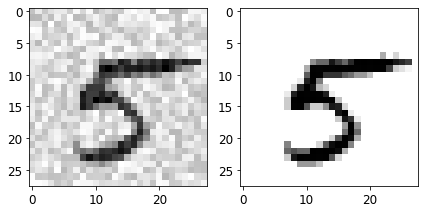

In [0]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

Nous pouvons maintenant entraîner un modèle $k$-_plus-proches-voisins_ à nettoyer nos images. 

In [0]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
clean_digit = knn_clf.predict(X_test_mod[some_index])
plot_digit(clean_digit)


ValueError: ignored

In [0]:
other_index = 2312
clean_digit = knn_clf.predict(X_test_mod[other_index])
plt.subplot(121); plot_digit(X_test_mod[other_index])
plt.subplot(122); plot_digit(clean_digit)

ValueError: ignored